## PIZZA Restaurant SALES

🍕The Pizza Challenge
For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:

Welcome aboard, we're glad you're here to help!

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.

Here are some questions that we'd like to be able to answer:

- What days and times do we tend to be busiest?
- How many pizzas are we making during peak periods?
- What are our best and worst-selling pizzas?
- What's our average order value?
- How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)
That's all I can think of for now, but if you have any other ideas I'd love to hear them – you're the expert!

Thanks in advance,

Mario Maven (Manager, Plato's Pizza)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_excel('C:/Users/ADMIN/Desktop/Data Model - Pizza Sales.xlsx')

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [36]:
## making new column 
df['datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['order_date'], row['order_time']), axis=1)


In [6]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,datetime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40


In [7]:
###watching data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  datetime           48620 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory 

In [8]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [9]:
df["pizza_name"].value_counts()


The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [10]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
datetime             0
dtype: int64

### Answering the client questions 

##  What days and times do we tend to be busiest?

In [11]:
# Extract the day of the week from the datetime column
df['day_of_week'] = df['datetime'].dt.day_name()

# Extract the hour from the datetime column
df['hour'] = df['datetime'].dt.hour

In [12]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,datetime,day_of_week,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36,Thursday,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40,Thursday,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40,Thursday,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40,Thursday,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40,Thursday,11


In [13]:
# Count the number of orders for each day of the week and hour
busy_times = df.groupby(['day_of_week', 'hour']).size().reset_index(name='order_count')
# Find the busiest day and hour
busiest_time = busy_times.loc[busy_times['order_count'].idxmax()]


In [14]:
print("Busiest day and time")
print("Day:", busiest_time['day_of_week'])
print("Hour:", busiest_time['hour'])
print("Number of orders:", busiest_time['order_count'])

Busiest day and time
Day: Thursday
Hour: 12
Number of orders: 1106


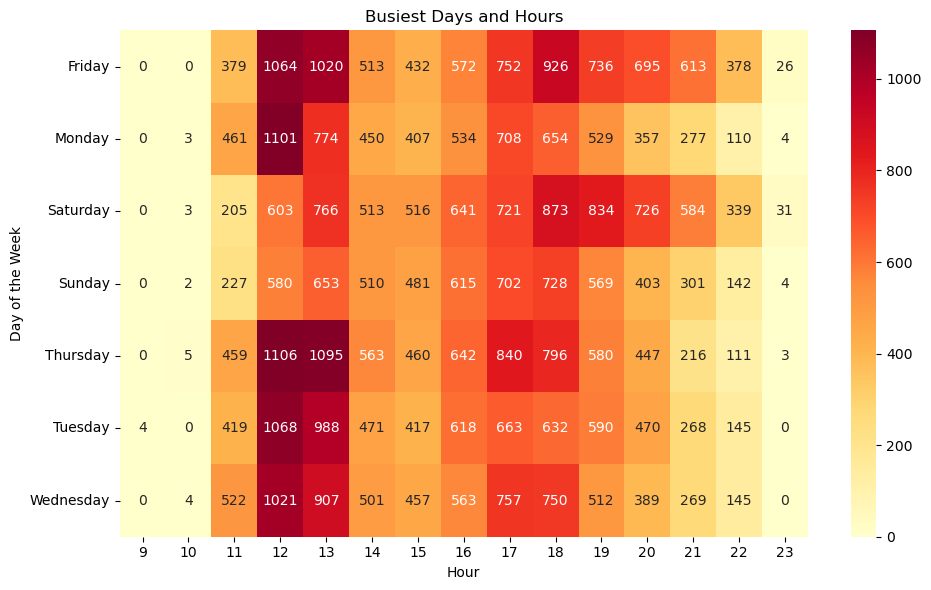

In [15]:
# Pivot the data to create a matrix for heatmap and replace missing/non-numeric values with zeros
heatmap_data = busy_times.pivot('day_of_week', 'hour', 'order_count').fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.title('Busiest Days and Hours')
plt.tight_layout()
plt.show()

- From above heatmap we can see that everyday around 12 noon seems to be busiest time of the restaurant
- Thursdays are the busiest with around 1106 orders at 12 pm.

# How many pizzas are we making during peak periods?

In [35]:
# Define the peak periods
peak_periods = [12,13]  # Example: 6 PM to 9 PM

# Filter the dataframe for the peak periods
peak_df = df[df['hour'].isin(peak_periods)]

# Calculate the total quantity of pizzas ordered during peak periods
total_pizzas_during_peak = peak_df['quantity'].sum()

print("Total number of pizzas made during peak periods are:", total_pizzas_during_peak)

Total number of pizzas made during peak periods are: 13189


# What are our best and worst-selling pizzas?

<AxesSubplot:>

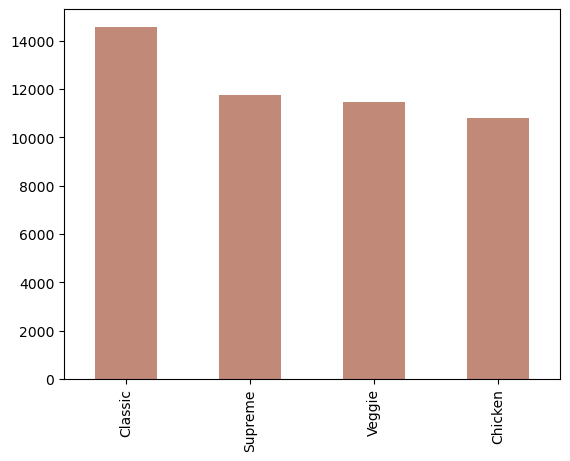

In [16]:
category = df['pizza_category'].value_counts()
(df["pizza_category"].value_counts()).plot(kind ='bar',color='#c18978')

- classic pizzas are best pizza category sold

In [17]:
pizzas_sum = df.groupby('pizza_id')['quantity'].sum().sort_values(ascending = False)

In [18]:
print('Top 10 best selling pizza:\n',pizzas_sum.head(10))

Top 10 best selling pizza:
 pizza_id
big_meat_s       1914
thai_ckn_l       1410
five_cheese_l    1409
four_cheese_l    1316
classic_dlx_m    1181
spicy_ital_l     1109
hawaiian_s       1020
southw_ckn_l     1016
bbq_ckn_l         992
bbq_ckn_m         956
Name: quantity, dtype: int64


In [19]:
print('Top 10 worst selling pizza:\n',pizzas_sum.iloc[-10:])

Top 10 worst selling pizza:
 pizza_id
spinach_supr_m    267
the_greek_l       255
ital_supr_s       196
ital_veggie_l     190
ckn_alfredo_l     188
mexicana_s        162
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     95
the_greek_xxl      28
Name: quantity, dtype: int64


#### Visualizing best and worst pizzas

In [20]:
pizzas_sum = pizzas_sum.reset_index(name='total_quantity')


In [21]:
pizzas_sum.head()

,pizza_id,total_quantity
0,big_meat_s,1914
1,thai_ckn_l,1410
2,five_cheese_l,1409
3,four_cheese_l,1316
4,classic_dlx_m,1181


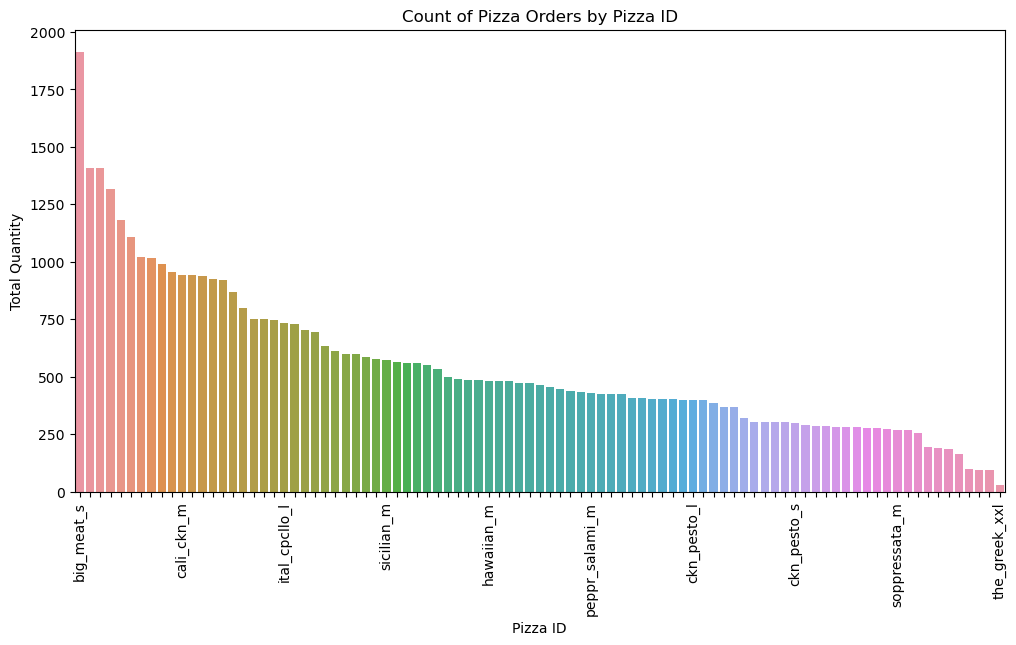

In [22]:
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(data=pizzas_sum, x='pizza_id', y='total_quantity')
plt.xlabel('Pizza ID')
plt.ylabel('Total Quantity')
plt.title('Count of Pizza Orders by Pizza ID')
plt.xticks(rotation=90)

# Display every nth label on the x-axis
n = 10  
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.show()

# What's our average order value?

In [23]:
# Calculate the total order value
df['total_order_value'] = df['quantity'] * df['total_price']

In [24]:
# Calculate the average order value
average_order_value = df['total_order_value'].sum() / len(df)

# Print the average order value
print("Average Order Value is:", average_order_value)

Average Order Value is: 17.495593377211023


# How well are we utilizing our seating capacity?

In [25]:
# Group the data by date and time and calculate the total number of guests
guests_per_slot = df.groupby(['datetime'])['quantity'].sum().reset_index()

In [26]:
guests_per_slot.max()

datetime    2015-12-31 23:02:05
quantity                     28
dtype: object

In [27]:
# Calculate the maximum number of guests among all time slots
max_guests = guests_per_slot['quantity'].max()

In [28]:
# Define the total number of available seats
total_seats = 60

# Calculate the seat occupancy rate
seat_occupancy_rate = (max_guests / total_seats) * 100

# Print the seat occupancy rate
print("Seat Occupancy Rate:", seat_occupancy_rate, "%")

Seat Occupancy Rate: 46.666666666666664 %


We can see that during the hour with the most orders i.e 28 the occupancy rate is 46% only 
This means that half of the restaurant was empty during that time